In [1]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [4]:
#PATH = 'covid_19_in_education.xlsx'
df = pd.read_csv('covid_19_in_education.csv')

In [5]:
df.head()

,submission_id,submission_date,gender,age,geography,financial_situation,education,employment_status,submission_state,can_children_observe_deterioration_of_basic_services_of_school,do_children_3_and_17_yrs_receive_regular_school_meals,are_there_teachers_at_scheduled_class_hours
0,4.570000e+15,17-03-2021,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,1,Every day,Irregularly
1,6.440000e+15,29-03-2021,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda,1,No,Irregularly
2,5.000000e+15,18-03-2021,Female,26 to 35 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,No,There are not enough
3,5.520000e+15,24-03-2021,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,No,There are enough
4,5.030000e+15,18-03-2021,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,1,No,There are not enough


 ##                                                Preprocessing 

deleting unnecessary columns

In [6]:
print(df['geography'].unique())
print()
print(df['age'].unique())
print()
print(df['education'].unique())
print()
print(df['employment_status'].unique())

['Suburban/Peri-urban' 'City center or metropolitan area' 'Rural'
 'Not Available']

['Over 45 years old' '26 to 35 years old' '36 to 45 years old'
 '16 to 25 years old' 'Under 16' 'Not Available']

['University or college degree completed'
 'Technical school diploma or degree completed'
 'Some technical education (e.g polytechnic school)'
 'Some university or college' 'Secondary school/ high school completed'
 'Primary school completed' 'Some primary education'
 'Some secondary school / high school' 'Post-graduate education'
 'Prefer not to answer' 'No formal education' 'Not available'
 'College or university' 'Post graduate' 'Technical school'
 'Secondary/high school']

['I am unemployed'
 'I work full-time, either as an employee or self-employed'
 'I do housework, fulfilling domestic tasks, looking after children'
 'I work part-time, either as an employee or self-employed' 'I am retired'
 'I am a student and I work part-time' 'I am a student'
 'None of the above' 'I am doing communi

In [7]:
df = df.drop('submission_id', axis=1)
df = df.drop('submission_date', axis=1)
# # df = df.drop('Unnamed: 9', axis=1)

In [8]:
df.head()

,gender,age,geography,financial_situation,education,employment_status,submission_state,can_children_observe_deterioration_of_basic_services_of_school,do_children_3_and_17_yrs_receive_regular_school_meals,are_there_teachers_at_scheduled_class_hours
0,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,1,Every day,Irregularly
1,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda,1,No,Irregularly
2,Female,26 to 35 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,No,There are not enough
3,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,No,There are enough
4,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,1,No,There are not enough


finding unique values in "age" column

## outliers detection

In [9]:
df['gender'].value_counts()
## since female is the highest so we replace the unavailable values with the max values.
df.loc[df["gender"] == "Not Available", "gender"] = 'Female'

**AGE**

In [10]:
df['age'].value_counts()

26 to 35 years old    1304
16 to 25 years old    1302
36 to 45 years old    1087
Over 45 years old      739
Not Available            3
Under 16                 1
Name: age, dtype: int64

In [11]:
df.loc[df["age"] == "Not Available", "age"] = '26 to 35 years old'

**Geography**

In [12]:
df['geography'].value_counts()

City center or metropolitan area    1920
Suburban/Peri-urban                 1374
Rural                               1141
Not Available                          1
Name: geography, dtype: int64

In [13]:
df.loc[df["geography"] == "Not Available", 'geography'] = 'City center or metropolitan area'

**Financial Situation**

In [14]:
df['financial_situation'].value_counts()

I can afford food, but nothing else                                                1445
I cannot afford enough food for my family                                          1163
I can afford food and regular expenses, but nothing else                           1060
I can afford food, regular expenses, and clothes, but nothing else                  244
Prefer not to answer                                                                239
I can comfortably afford food, clothes, and furniture, and I have savings           157
I can comfortably afford food, clothes, and furniture, but I don’t have savings     127
Not Available                                                                         1
Name: financial_situation, dtype: int64

In [15]:
df.loc[df["financial_situation"] == "Not Available", "financial_situation"] = 'I can afford food, but nothing else'

**Education**

In [16]:
df['education'].value_counts()

University or college degree completed               1327
Secondary school/ high school completed              1089
Technical school diploma or degree completed          580
Some university or college                            379
Some technical education (e.g polytechnic school)     322
Some secondary school / high school                   279
Post-graduate education                               241
Primary school completed                               98
Prefer not to answer                                   58
Some primary education                                 36
No formal education                                    20
College or university                                   3
Not available                                           1
Post graduate                                           1
Technical school                                        1
Secondary/high school                                   1
Name: education, dtype: int64

In [17]:
df.loc[df["education"] == "Not available", "education"] = 'University or college degree completed'

**Employment Status**

In [18]:
df['employment_status'].value_counts()

I work part-time, either as an employee or self-employed             1130
I work full-time, either as an employee or self-employed             1038
I am unemployed                                                       618
I am a student                                                        594
I am a student and I work part-time                                   379
I do housework, fulfilling domestic tasks, looking after children     356
None of the above                                                     165
I am retired                                                          120
I am unable to work due to long-term illness or disability             16
I am doing community or military service                               13
Employed full-time                                                      3
Not Available                                                           1
Retired                                                                 1
Student                               

In [19]:
df.loc[df["employment_status"] == "Not Available", "employment_status"] = 'I work part-time, either as an employee or self-employed '

**Submission State**

In [20]:
df['submission_state'].value_counts()

Miranda             732
Zulia               611
Distrito Federal    556
Táchira             462
Lara                354
Anzoátegui          346
Bolívar             245
Aragua              169
Sucre               164
Carabobo            161
Mérida               91
Falcón               67
Monagas              66
Guárico              58
Apure                54
Portuguesa           54
Trujillo             53
Yaracuy              48
Vargas               46
Nueva Esparta        38
Barinas              32
Cojedes              18
Delta Amacuro         9
Amazonas              2
Name: submission_state, dtype: int64

*************************************************************************************************************************

In [21]:
n = len(pd.unique(df['age']))
print("No.of.unique values :",n)

No.of.unique values : 5


In [22]:
a = df['age'].unique()
print(sorted(a))

['16 to 25 years old', '26 to 35 years old', '36 to 45 years old', 'Over 45 years old', 'Under 16']


no 'unavailable' or missing value.

In [23]:
df.head()

,gender,age,geography,financial_situation,education,employment_status,submission_state,can_children_observe_deterioration_of_basic_services_of_school,do_children_3_and_17_yrs_receive_regular_school_meals,are_there_teachers_at_scheduled_class_hours
0,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,1,Every day,Irregularly
1,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda,1,No,Irregularly
2,Female,26 to 35 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,No,There are not enough
3,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,No,There are enough
4,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,1,No,There are not enough


In [24]:
#df['gender'] = int(df['gender'])
print (df.dtypes)

gender                                                            object
age                                                               object
geography                                                         object
financial_situation                                               object
education                                                         object
employment_status                                                 object
submission_state                                                  object
can_children_observe_deterioration_of_basic_services_of_school     int64
do_children_3_and_17_yrs_receive_regular_school_meals             object
are_there_teachers_at_scheduled_class_hours                       object
dtype: object


In [25]:
n = len(pd.unique(df['financial_situation']))
print("No.of.unique values :",n)

print()

a = df['financial_situation'].unique()
print(sorted(a))

No.of.unique values : 7

['I can afford food and regular expenses, but nothing else', 'I can afford food, but nothing else', 'I can afford food, regular expenses, and clothes, but nothing else', 'I can comfortably afford food, clothes, and furniture, and I have savings', 'I can comfortably afford food, clothes, and furniture, but I don’t have savings', 'I cannot afford enough food for my family', 'Prefer not to answer']


In [26]:
n = len(pd.unique(df['gender']))
print("No.of.unique values :",n)

print()

a = df['gender'].unique()
print(sorted(a))

No.of.unique values : 4

['Female', 'Male', 'Non-Binary', 'Prefer not to answer']


In [27]:
df = df.drop('can_children_observe_deterioration_of_basic_services_of_school', axis=1)
df = df.drop('do_children_3_and_17_yrs_receive_regular_school_meals', axis=1)
df = df.drop('are_there_teachers_at_scheduled_class_hours', axis=1)


In [28]:
print (df.dtypes)

gender                 object
age                    object
geography              object
financial_situation    object
education              object
employment_status      object
submission_state       object
dtype: object


In [29]:
final_data = pd.get_dummies(df, drop_first = True)

In [30]:
final_data.head()

,gender_Male,gender_Non-Binary,gender_Prefer not to answer,age_26 to 35 years old,age_36 to 45 years old,age_Over 45 years old,age_Under 16,geography_Rural,geography_Suburban/Peri-urban,"financial_situation_I can afford food, but nothing else",...,submission_state_Monagas,submission_state_Mérida,submission_state_Nueva Esparta,submission_state_Portuguesa,submission_state_Sucre,submission_state_Trujillo,submission_state_Táchira,submission_state_Vargas,submission_state_Yaracuy,submission_state_Zulia
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
n = len(pd.unique(df['submission_state']))
print("No.of.unique values :",n)


No.of.unique values : 24


##  DATA VISUALIZATION

## Pair Plot

In [32]:
df.head()
from sklearn.preprocessing import LabelEncoder

In [33]:
nonlabled_df=df.copy()

In [34]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['gender']= label_encoder.fit_transform(df['gender']) 
print(df.head())

   gender                 age                         geography  \
0       0   Over 45 years old               Suburban/Peri-urban   
1       1  26 to 35 years old               Suburban/Peri-urban   
2       0  26 to 35 years old  City center or metropolitan area   
3       1  36 to 45 years old               Suburban/Peri-urban   
4       0   Over 45 years old               Suburban/Peri-urban   

                                 financial_situation  \
0  I can afford food and regular expenses, but no...   
1          I cannot afford enough food for my family   
2  I can comfortably afford food, clothes, and fu...   
3                I can afford food, but nothing else   
4  I can afford food and regular expenses, but no...   

                                education  \
0  University or college degree completed   
1  University or college degree completed   
2  University or college degree completed   
3  University or college degree completed   
4  University or college degree com

In [35]:
a = df['gender'].unique()
print("gender:")
print(sorted(a))

b = df['age'].unique()
print("age:")
print(sorted(b))

c = df['geography'].unique()
print("geography:")
print(sorted(c))

d = df['education'].unique()
print("education:")
print(sorted(d))

e = df['employment_status'].unique()
print("employment_status:")
print(sorted(e))

f = df['submission_state'].unique()
print("submission_state:")
print(sorted(f))

gender:
[0, 1, 2, 3]
age:
['16 to 25 years old', '26 to 35 years old', '36 to 45 years old', 'Over 45 years old', 'Under 16']
geography:
['City center or metropolitan area', 'Rural', 'Suburban/Peri-urban']
education:
['College or university', 'No formal education', 'Post graduate', 'Post-graduate education', 'Prefer not to answer', 'Primary school completed', 'Secondary school/ high school completed', 'Secondary/high school', 'Some primary education', 'Some secondary school / high school', 'Some technical education (e.g polytechnic school)', 'Some university or college', 'Technical school', 'Technical school diploma or degree completed', 'University or college degree completed']
employment_status:
['Employed full-time', 'I am a student', 'I am a student and I work part-time', 'I am doing community or military service', 'I am retired', 'I am unable to work due to long-term illness or disability', 'I am unemployed', 'I do housework, fulfilling domestic tasks, looking after children', 'I 

In [36]:
df['age']= label_encoder.fit_transform(df['age']) 
df['geography']= label_encoder.fit_transform(df['geography']) 
df['financial_situation']= label_encoder.fit_transform(df['financial_situation']) 
df['education']= label_encoder.fit_transform(df['education']) 
df['employment_status']= label_encoder.fit_transform(df['employment_status']) 
df['submission_state']= label_encoder.fit_transform(df['submission_state']) 

In [37]:
df.head()

,gender,age,geography,financial_situation,education,employment_status,submission_state
0,0,3,2,0,14,6,13
1,1,1,2,5,14,6,13
2,0,1,0,3,14,8,13
3,1,2,2,1,14,8,13
4,0,3,2,0,14,6,13


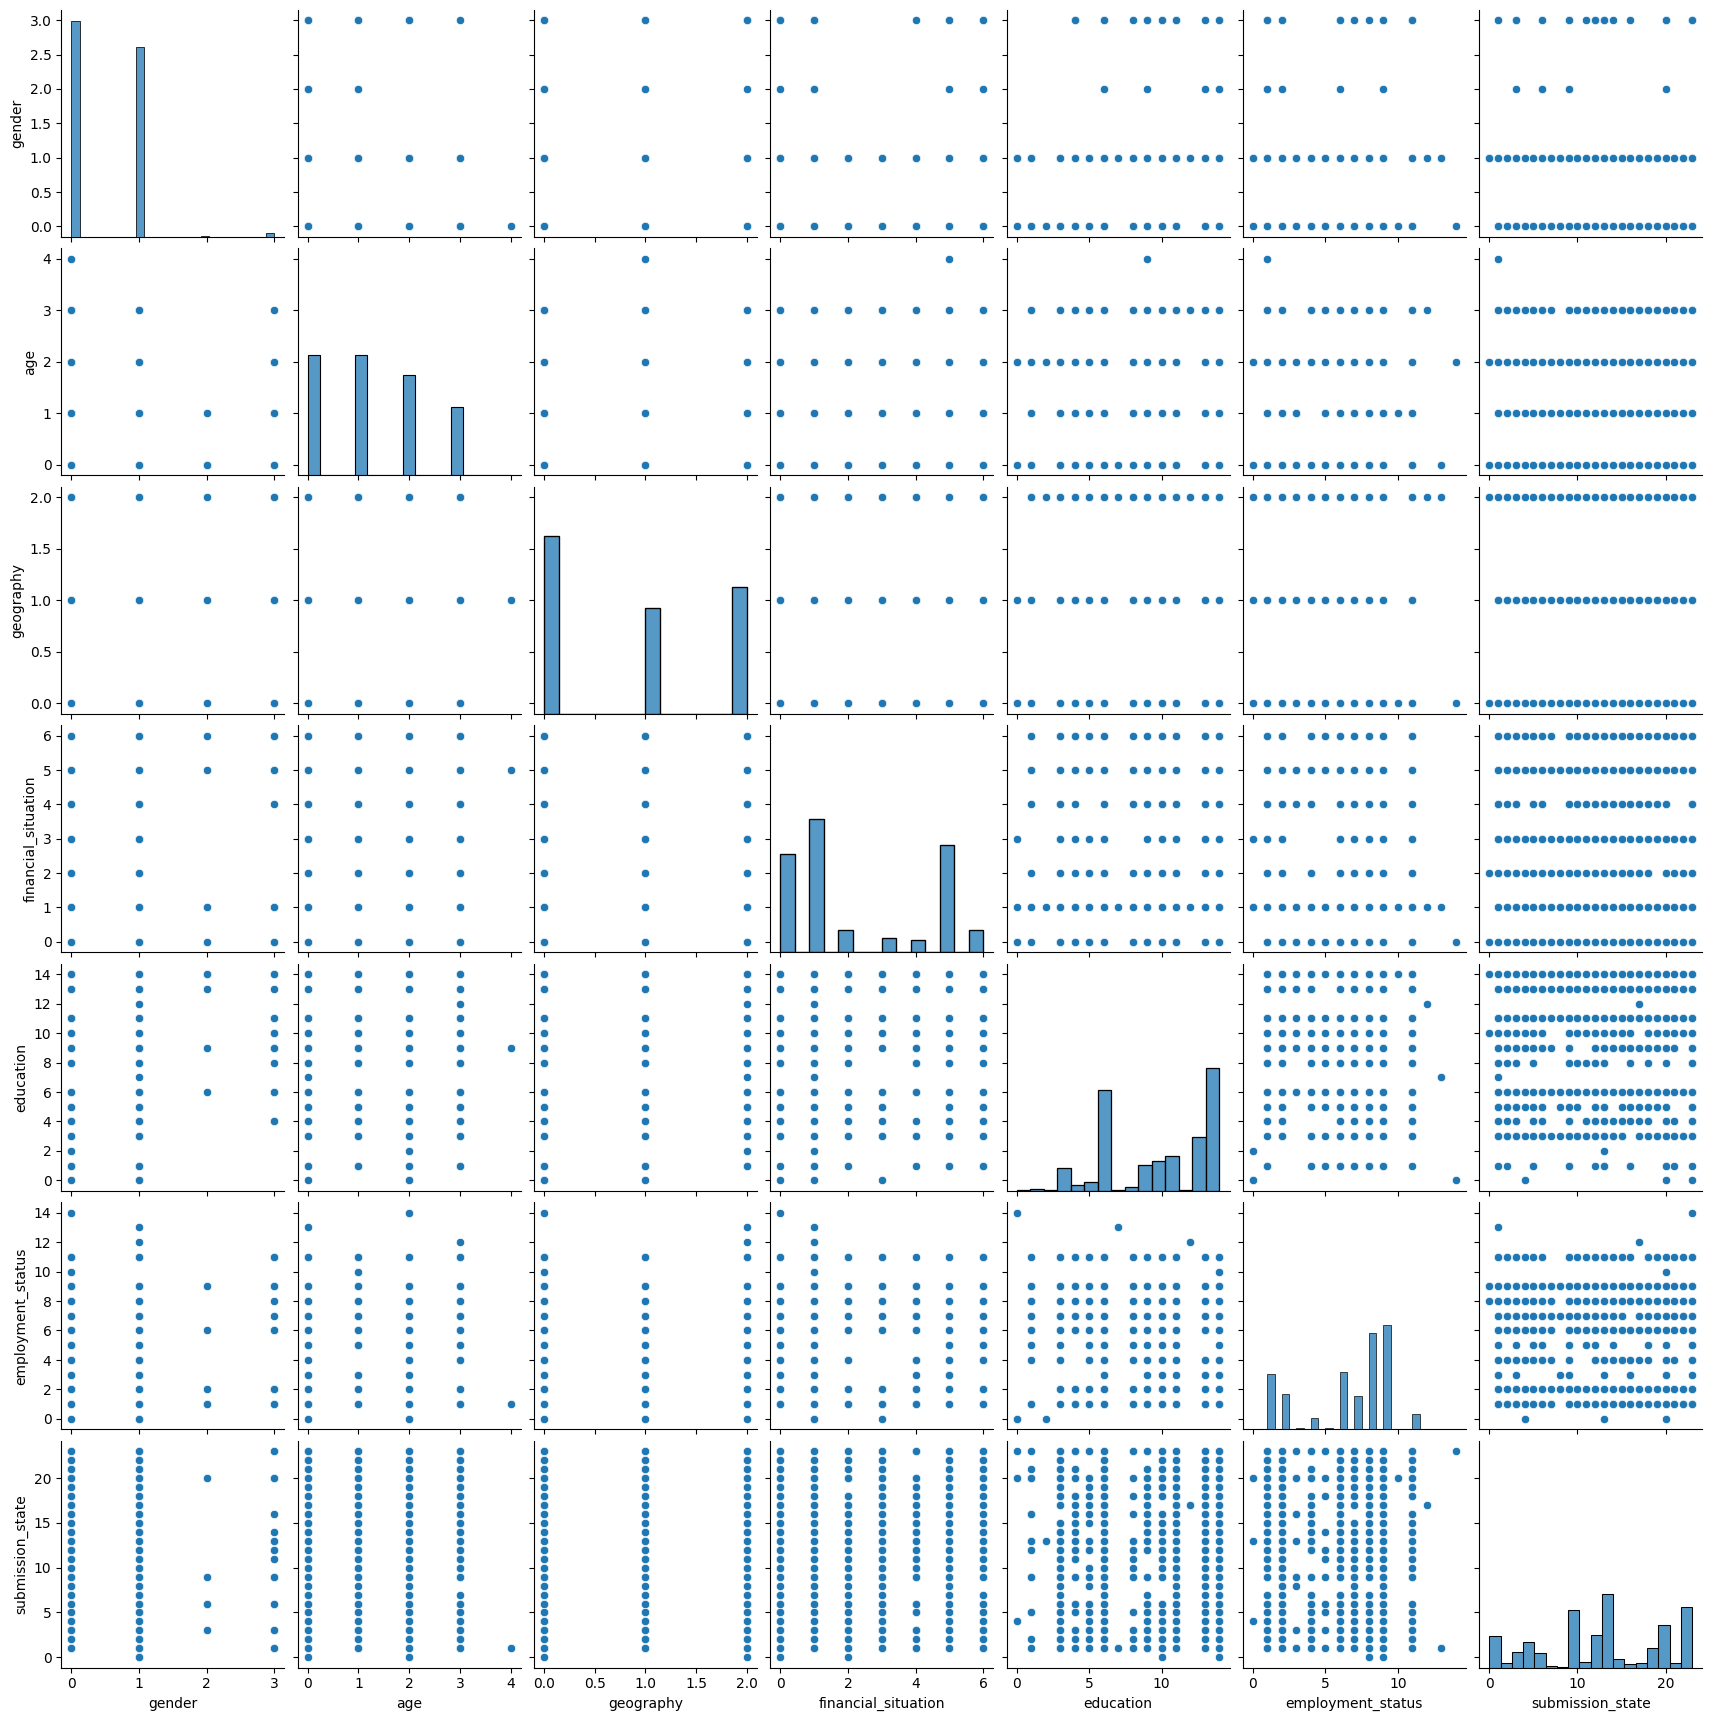

In [38]:
sns.pairplot(df)

## Heat Map

<AxesSubplot:>

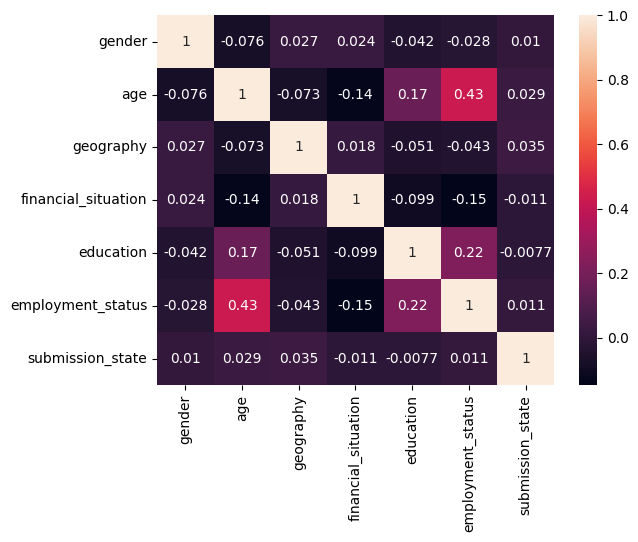

In [39]:
sns.heatmap(df.corr(),annot=True)

In [40]:
nonlabled_df.head()

,gender,age,geography,financial_situation,education,employment_status,submission_state
0,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda
1,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda
2,Female,26 to 35 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda
3,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda
4,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda


In [41]:
nonlabled_df['geography'].unique()

array(['Suburban/Peri-urban', 'City center or metropolitan area', 'Rural'],
      dtype=object)

In [42]:
import matplotlib.pyplot as plt
import numpy as np

In [43]:
labels = ['University or college degree completed','Secondary school/ high school completed','Technical school diploma or degree completed','Some university or college','Some technical education (e.g polytechnic school)','Post-graduate education','Some secondary school / high school','Primary school completed','Prefer not to answer','Some primary education','No formal education','Post graduate','Secondary/high school','Technical school']

In [44]:
nonlabled_df['geography'].unique()

array(['Suburban/Peri-urban', 'City center or metropolitan area', 'Rural'],
      dtype=object)

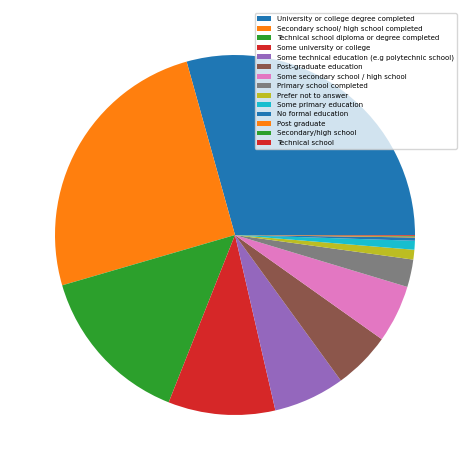

In [45]:
geo_data = nonlabled_df.loc[nonlabled_df['geography'] == 'Suburban/Peri-urban']
geo_data.head()
geo_data = geo_data[['education']]
plt.pie(geo_data.value_counts())
plt.legend(labels, loc="best",prop={'size': 5},)
plt.tight_layout()
plt.show()

In [46]:
nonlabled_df.head()

,gender,age,geography,financial_situation,education,employment_status,submission_state
0,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda
1,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda
2,Female,26 to 35 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda
3,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda
4,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda


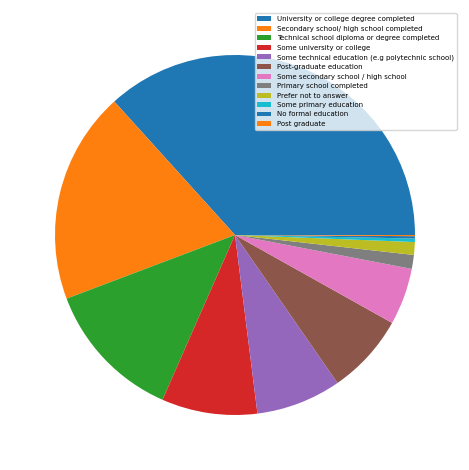

In [47]:
geo_data = nonlabled_df.loc[nonlabled_df['geography'] == 'City center or metropolitan area']
geo_data = geo_data[['education']]
plt.pie(geo_data.value_counts())
plt.legend(labels, loc="best",prop={'size': 5},)
plt.tight_layout()
plt.show()


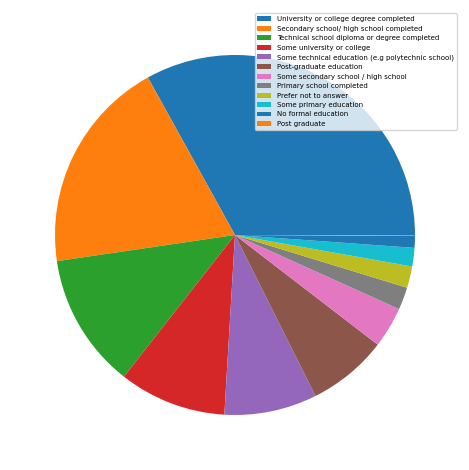

In [48]:
geo_data = nonlabled_df.loc[nonlabled_df['geography'] == 'Rural']
geo_data = geo_data[['education']]
plt.pie(geo_data.value_counts())
plt.legend(labels, loc="best",prop={'size': 5},)
plt.tight_layout()
plt.show()


## Model Taining 

Expected 

In [49]:
df = df.rename(columns={'financial_situation': 'label'})

In [50]:
df.head()

,gender,age,geography,label,education,employment_status,submission_state
0,0,3,2,0,14,6,13
1,1,1,2,5,14,6,13
2,0,1,0,3,14,8,13
3,1,2,2,1,14,8,13
4,0,3,2,0,14,6,13


In [51]:
a = df['gender'].unique()
print("gender:")
print(sorted(a))

b = df['age'].unique()
print("age:")
print(sorted(b))

c = df['geography'].unique()
print("geography:")
print(sorted(c))

d = df['education'].unique()
print("education:")
print(sorted(d))

e = df['employment_status'].unique()
print("employment_status:")
print(sorted(e))

f = df['submission_state'].unique()
print("submission_state:")
print(sorted(f))

gender:
[0, 1, 2, 3]
age:
[0, 1, 2, 3, 4]
geography:
[0, 1, 2]
education:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
employment_status:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
submission_state:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [52]:
features = df[['gender', 'age','geography','education', 'employment_status']]
target = df['label']
labels = df['label']

In [53]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []


In [54]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =42)

## DecisionTreeClassifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  38.626126126126124
              precision    recall  f1-score   support

           0       0.37      0.41      0.39       230
           1       0.38      0.52      0.44       284
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        24
           5       0.43      0.45      0.44       226
           6       0.00      0.00      0.00        44

    accuracy                           0.39       888
   macro avg       0.17      0.20      0.18       888
weighted avg       0.32      0.39      0.35       888



### Predicting output:

In [56]:
data = np.array([[0, 3, 2, 7, 13]])
prediction = DecisionTree.predict(data)
print(prediction)

[1]


In [57]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTreeClassifier.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()